In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd

from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.datasets import make_classification, make_blobs

In [3]:
sns.set_style("whitegrid")

## get some random 2d points

In [4]:
n_samples = 400
df0 = pd.DataFrame({
    "target": -1,
    "x":  np.random.normal(size=n_samples) - 1.5,
    "y": np.random.normal(size=n_samples) + 1.5,
})
df1 = pd.DataFrame({
    "target": 1,
    "x":  np.random.normal(size=n_samples) + 1.5,
    "y": np.random.normal(size=n_samples) - 1.5,
})
df = pd.concat([df0, df1])

In [5]:
xmin, xmax = df.x.min() - 0.3, df.x.max() + 0.3
ymin, ymax = df.y.min() - 0.3, df.y.max() + 0.3

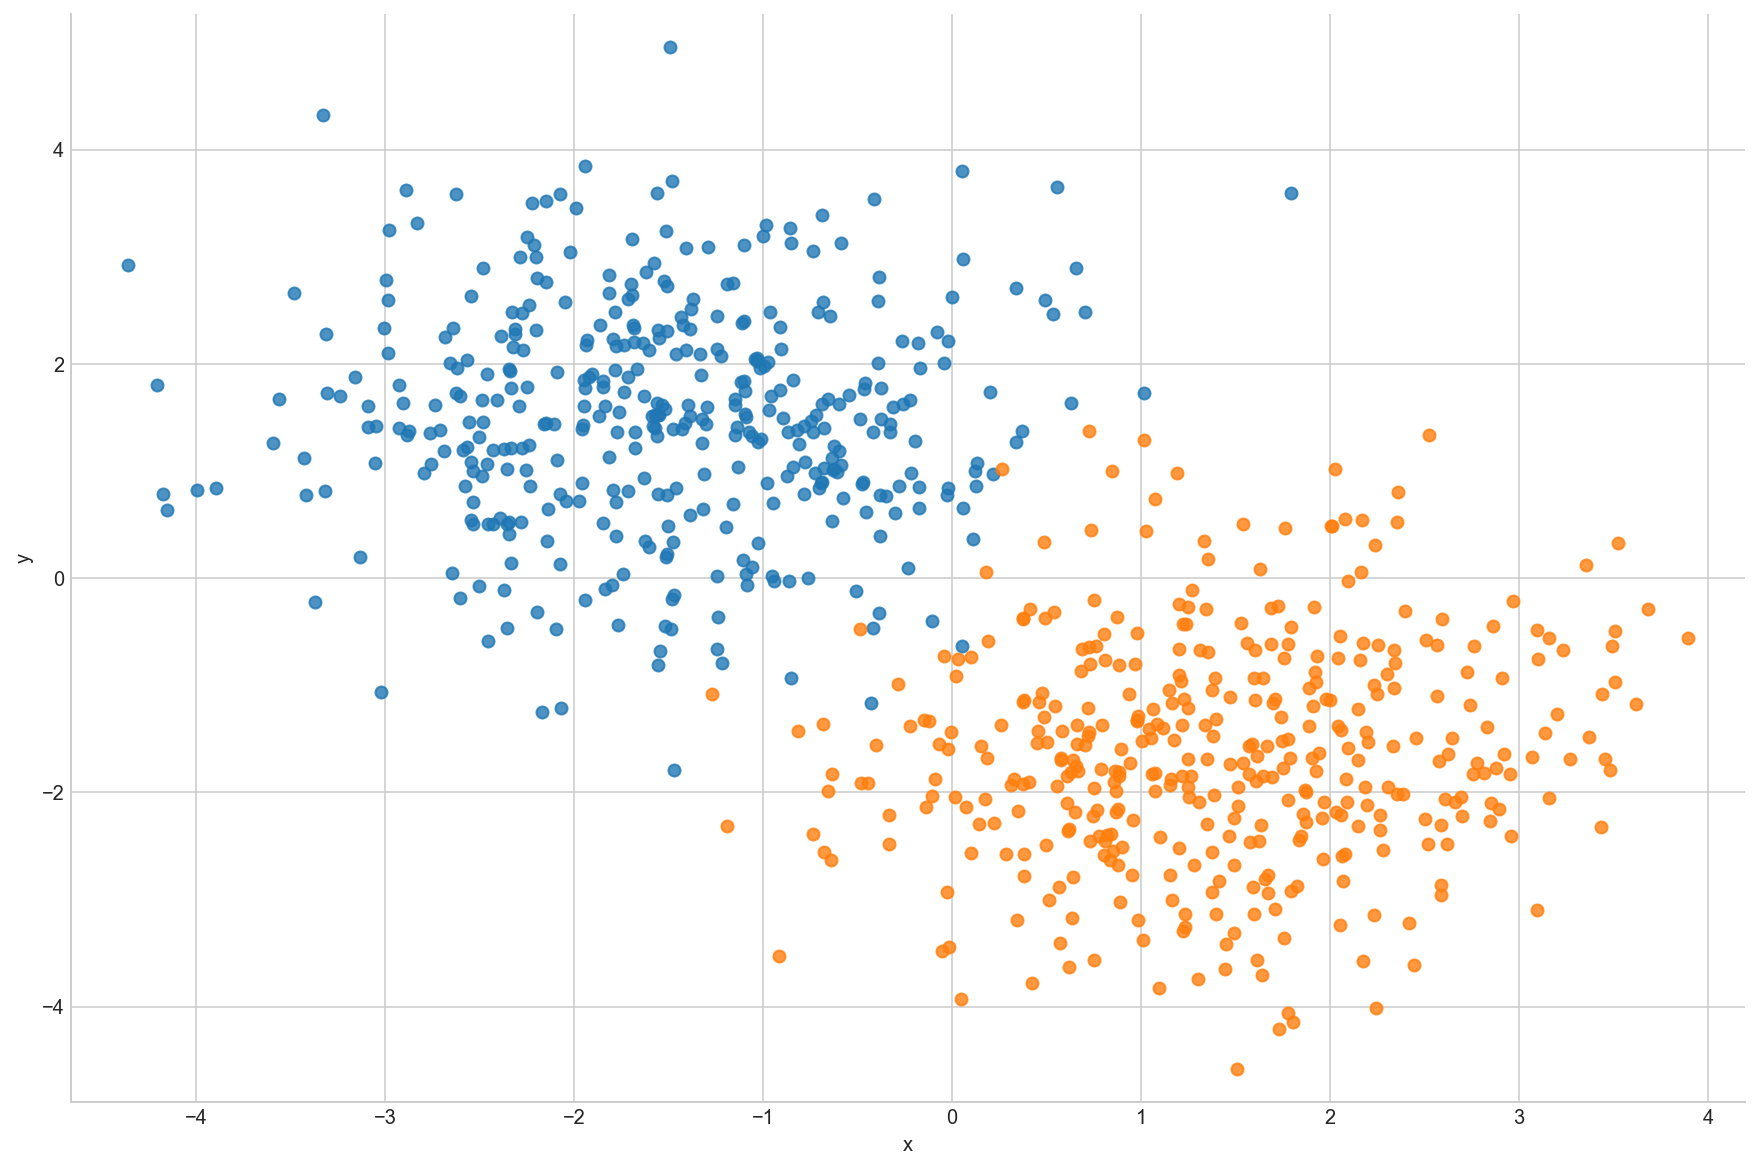

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = sns.regplot(x=df0.x, y=df0.y, fit_reg=False, ax=ax)
_ = sns.regplot(x=df1.x, y=df1.y, fit_reg=False, ax=ax)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
sns.despine()

## train the model

In [7]:
def perceptron(features, targets, w):
    for x, target in zip(features, targets):
        if np.dot(w, x) <= 0:
            w += x * target
    return w

In [9]:
features = np.concatenate(
    (df[["x", "y"]].values, np.full(df.shape[0], 1).reshape(-1, 1)),
    axis=1
)

In [10]:
%%time
w = np.zeros(3)
for _ in range(1):
    w = perceptron(features, df.target, w)
    w = normalize(w.reshape(-1, 1), axis=0).reshape(-1)

CPU times: user 5.58 ms, sys: 2.34 ms, total: 7.92 ms
Wall time: 5.44 ms


## calculating the training accuracy

In [11]:
%%time
correct = 0
for x, t in zip(features, df.target):
    distance = np.dot(w, x)
    if distance * t > 0:
        correct += 1
print(correct / df.shape[0])

0.98125
CPU times: user 3.87 ms, sys: 2.48 ms, total: 6.35 ms
Wall time: 4.45 ms


In [12]:
%%time
correct = 0
for x, target in zip(features, df.target):
    correct += 1 if np.dot(w, x) * target > 0 else 0
print(correct / df.shape[0])

0.98125
CPU times: user 3.62 ms, sys: 2.57 ms, total: 6.19 ms
Wall time: 4.25 ms


In [13]:
%%time
sum(int(np.dot(w, x) * target > 0) for x, target in zip(features, df.target)) / df.shape[0]

CPU times: user 5.56 ms, sys: 3.62 ms, total: 9.18 ms
Wall time: 5.97 ms


0.98125

In [14]:
%%time
np.sum(np.dot(features * df.target.values.reshape(-1, 1), w) > 0) / df.shape[0]

CPU times: user 1.88 ms, sys: 1.52 ms, total: 3.39 ms
Wall time: 1.71 ms


0.98125

## draw the seperating line / model

In [15]:
x = np.arange(xmin, xmax, 0.1)
y = np.array ([(w[2] -  w[0] * x_) / w[1] for x_ in x])

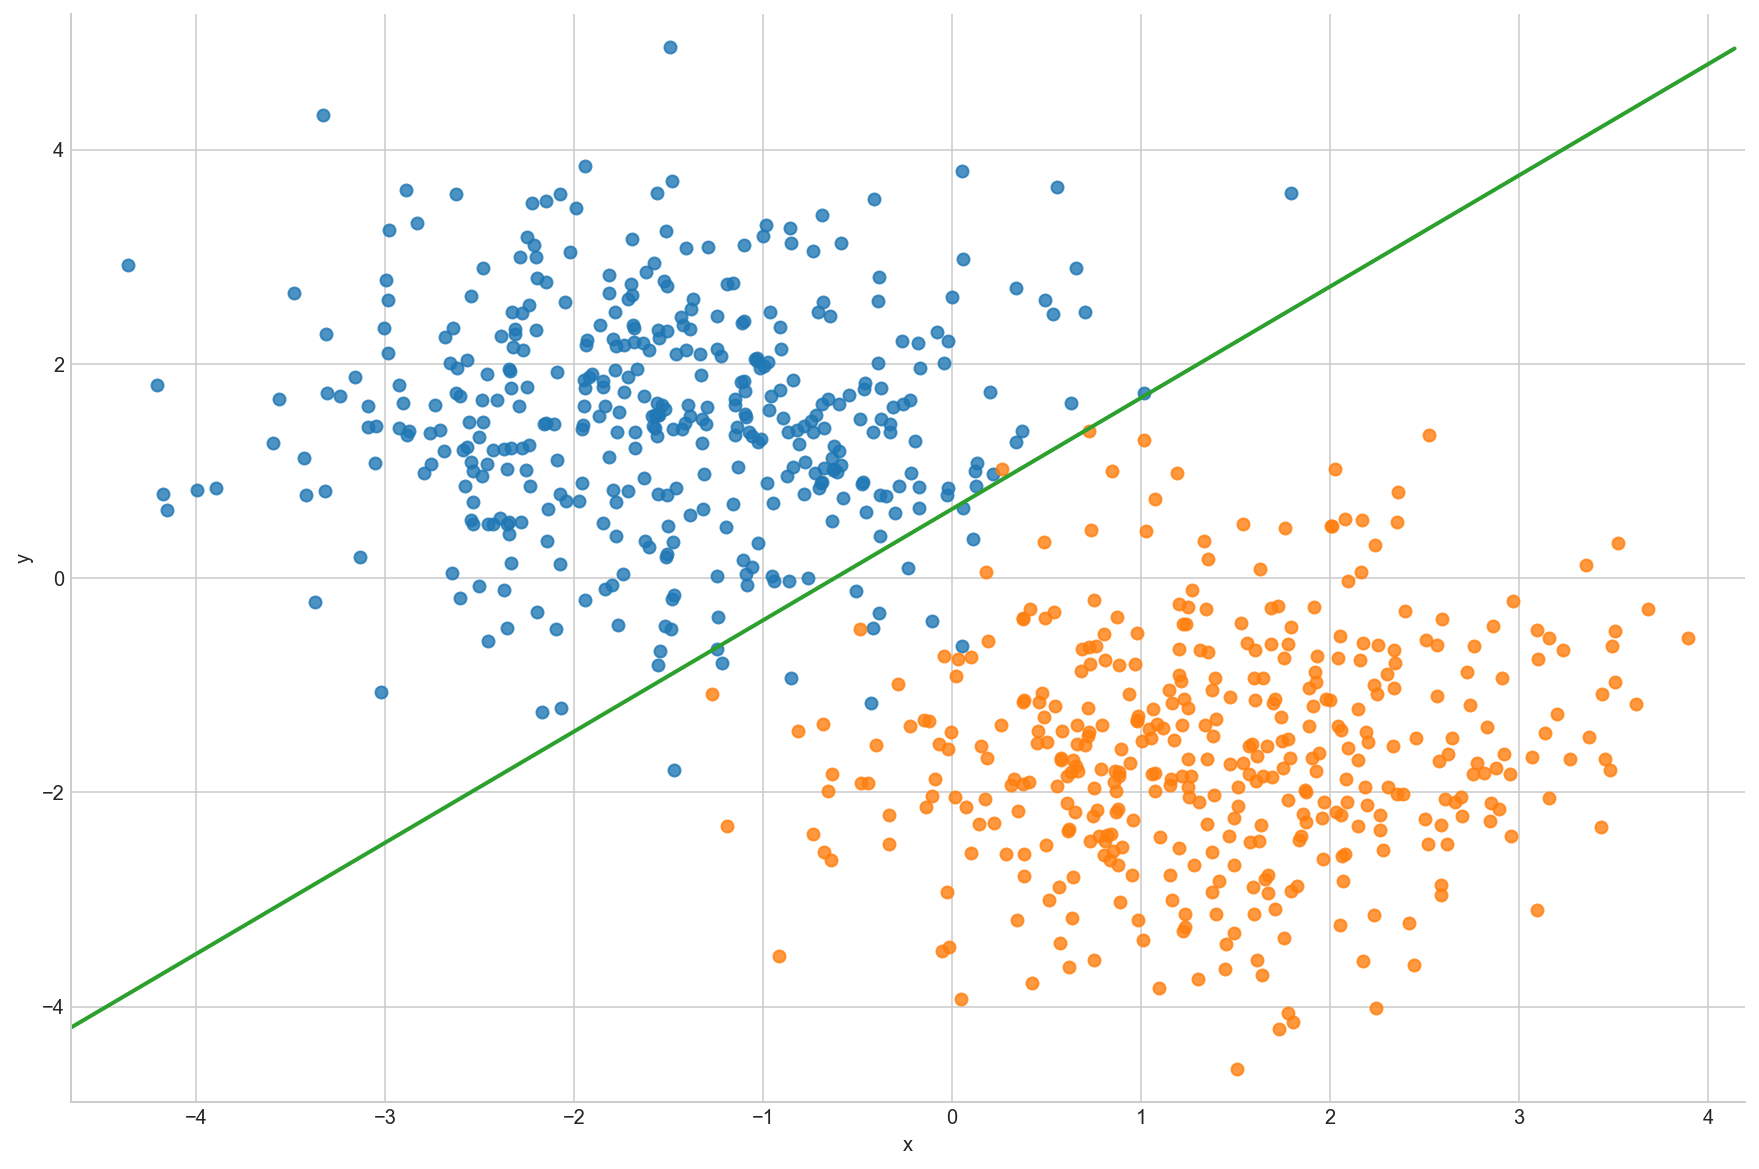

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = sns.regplot(x=df0.x, y=df0.y, fit_reg=False, ax=ax)
_ = sns.regplot(x=df1.x, y=df1.y, fit_reg=False, ax=ax)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.plot(x, y, linewidth=2)
sns.despine()

# animation of the training process

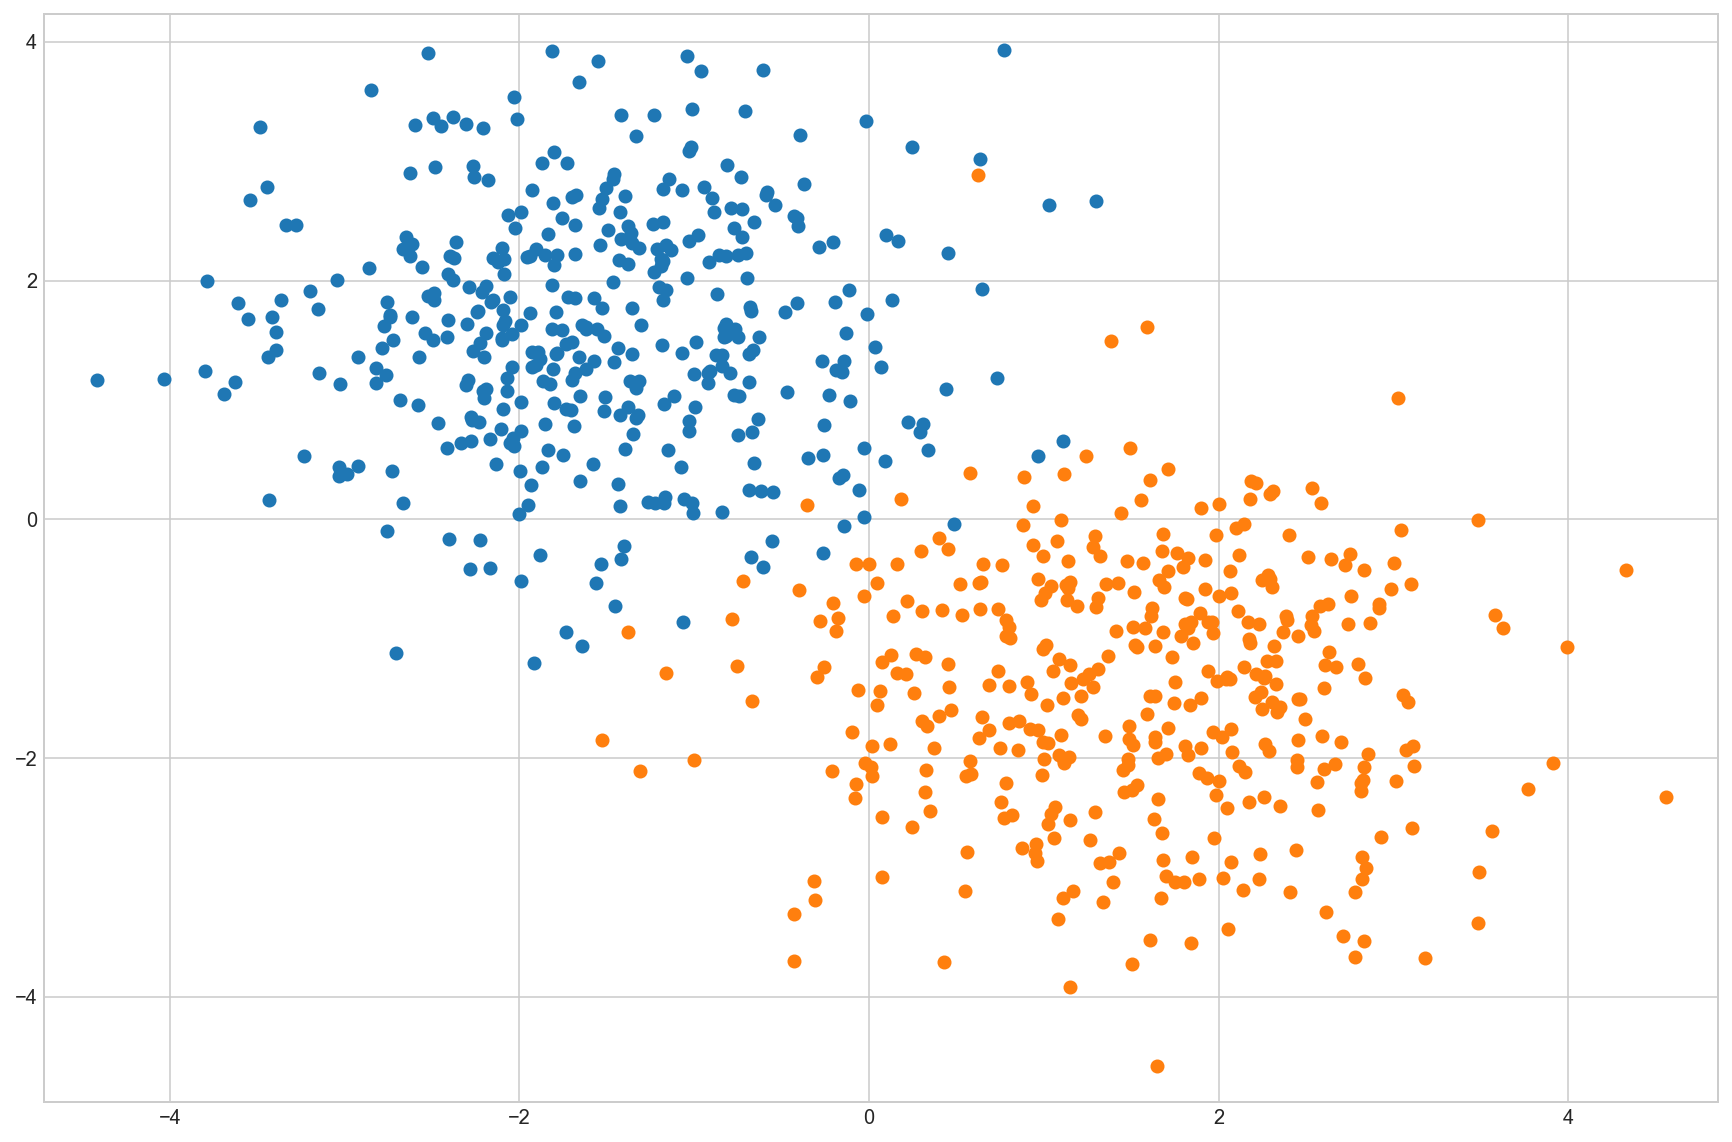

In [1123]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.scatter(df0.x, df0.y)
ax.scatter(df1.x, df1.y)
line, = ax.plot([], [], lw=2, color="red")

In [1124]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [1125]:
def perceptrons(features, targets, w):
    ws = []
    for x, target in zip(features, targets):
        if np.dot(w, x) <= 0:
            w += x * target
        ws.append(w.copy())
    return ws

In [1004]:
def perceptrons(features, targets, w=[0, 0, 0]):
    ws = []
    for (x, y), target in zip(features, targets):
        distance = x * w[0] + y * w[1]
        # print(target, x, y, distance)
        if distance <= 0:
            w[0] += x * target
            w[1] += y * target
            w[2] += 1 * target
        #print(w)
        ws.append(norm(w.copy()))
    return ws

In [1126]:
ws = perceptrons(features, df.target, [1., 1., 1.])

In [1127]:
len(ws)

800

In [1008]:
#[(i, w) for i, w in enumerate(ws) if w[0] == 0.5310788148597824]

In [1128]:
def animate(i):
    w = ws[i]
    x = np.linspace(xmin, xmax, 1000)
    y = np.array ([(w[2] - w[0] * x_) / w[1] for x_ in x])
    line.set_data(x, y)
    return (line,)

In [1129]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=800, interval=20, blit=True)

In [1130]:
HTML(anim.to_html5_video())

In [1134]:
anim.save("perceptron_training.mp4")